<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
import __future__
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

titanic_train = pd.read_csv('Titanic-Dataset.csv')
titanic_train.head(10) # Check out the first 10 rows of the training dataset
titanic_train.info() # Info about data frame dimensions, column types, and file size

In [ ]:
titanic_train.describe() # Generate a summary of statistics for each numerical column of the data frame
titanic_train.nunique()


# find column that have less than 10 uniue values
#and print their names with all the values they contain
lessthanten = []
for col in titanic_train.columns:
    lessthanten.append(titanic_train[col].nunique() < 10)

for col in titanic_train[titanic_train.columns[lessthanten]]:
    print(col, titanic_train[col].unique())

titanic_train['Cabin'].value_counts()


Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' nan]


Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [ ]:
# classify the Data according to Types

pd.DataFrame({'Integer': ['Survived','Pclass','SibSp, Parch','-'], 
              'Float': ['-','-','-','Age, Fare'], 
              'Object': ['Sex, Name, Ticket, Cabin, Embarked','-','-','-']}, 
              index = ['Nominal','Ordinal','Discrete','Continuous'])

,Integer,Float,Object
Nominal,Survived,-,"Sex, Name, Ticket, Cabin, Embarked"
Ordinal,Pclass,-,-
Discrete,"SibSp, Parch",-,-
Continuous,-,"Age, Fare",-


,Count,Percentage
Survived,,
0,549,61.6
1,342,38.4


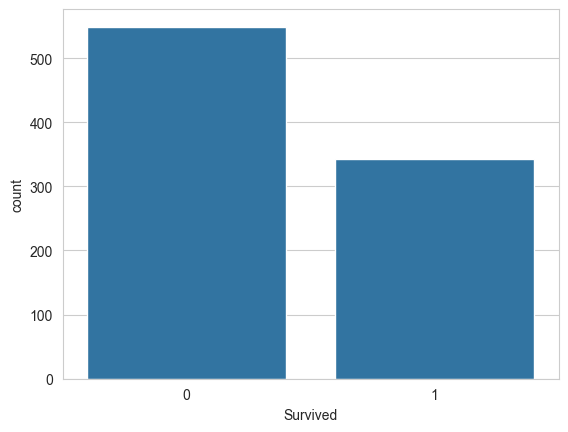

In [ ]:
# Define the count_n_plot function
def count_n_plot(df, col_name, countsplit = None, bar = False, barsplit = None):
    
    """
    Creates countplots and barplots of the specified feature 
    (with options to split the columns) and generates the 
    corresponding table of counts and percentages.
    
    Parameters
    ----------
    df : DataFrame
        Dataset for plotting.
    col_name : string
        Name of column/feature in "data".
    countsplit : string
        Use countsplit to specify the "hue" argument of the countplot.
    bar : Boolean
        If True, a barplot of the column col_name is created, showing
        the fraction of survivors on the y-axis.
    barsplit: string
        Use barsplit to specify the "hue" argument of the barplot.
    """

    if (countsplit != None) & bar & (barsplit != None):
        col_count1 = df[[col_name]].groupby(by = col_name).size()
        col_perc1 = col_count1.apply(lambda x: x / sum(col_count1) * 100).round(1)
        tcount1 = pd.DataFrame({'Count': col_count1, 'Percentage': col_perc1})
        
        col_count2 = df[[col_name,countsplit]].groupby(by = [col_name,countsplit]).size()
        col_perc2 = col_count2.apply(lambda x: x / sum(col_count2) * 100).round(1)
        tcount2 = pd.DataFrame({'Count': col_count2, 'Percentage': col_perc2})
        display(tcount1, tcount2) 
        
        figc, axc = plt.subplots(1, 2, figsize = (10,4))
        sns.countplot(data = df, x = col_name, hue = None, ax = axc[0])
        sns.countplot(data = df, x = col_name, hue = countsplit, ax = axc[1])
        
        figb, axb = plt.subplots(1, 2, figsize = (10,4))
        sns.barplot(data = df, x = col_name, y = 'Survived', hue = None, ax = axb[0])
        sns.barplot(data = df, x = col_name, y = 'Survived', hue = barsplit, ax = axb[1])
        
    elif (countsplit != None) & bar:
        col_count1 = df[[col_name]].groupby(by = col_name).size()
        col_perc1 = col_count1.apply(lambda x: x / sum(col_count1) * 100).round(1)
        tcount1 = pd.DataFrame({'Count': col_count1, 'Percentage': col_perc1})

        col_count2 = df[[col_name,countsplit]].groupby(by = [col_name,countsplit]).size()
        col_perc2 = col_count2.apply(lambda x: x / sum(col_count2) * 100).round(1)
        tcount2 = pd.DataFrame({'Count': col_count2, 'Percentage': col_perc2})
        display(tcount1, tcount2)
        
        fig, axes = plt.subplots(1, 3, figsize = (15,4))
        sns.countplot(data = df, x = col_name, hue = None, ax = axes[0])
        sns.countplot(data = df, x = col_name, hue = countsplit, ax = axes[1])
        sns.barplot(data = df, x = col_name, y = 'Survived', hue = None, ax = axes[2])
        
    elif countsplit != None:
        col_count1 = df[[col_name]].groupby(by = col_name).size()
        col_perc1 = col_count1.apply(lambda x: x / sum(col_count1) * 100).round(1)
        tcount1 = pd.DataFrame({'Count': col_count1, 'Percentage': col_perc1})
        
        col_count2 = df[[col_name,countsplit]].groupby(by = [col_name,countsplit]).size()
        col_perc2 = col_count2.apply(lambda x: x / sum(col_count2) * 100).round(1)
        tcount2 = pd.DataFrame({'Count': col_count2, 'Percentage': col_perc2})
        display(tcount1, tcount2)

        fig, axes = plt.subplots(1, 2, figsize = (10,4))
        sns.countplot(data = df, x = col_name, hue = None, ax = axes[0])
        sns.countplot(data = df, x = col_name, hue = countsplit, ax = axes[1])
        
    else:
        col_count = df[[col_name]].groupby(by = col_name).size()
        col_perc = col_count.apply(lambda x: x / sum(col_count) * 100).round(1)
        tcount1 = pd.DataFrame({'Count': col_count, 'Percentage': col_perc})
        display(tcount1)        
        
        sns.countplot(data = df, x = col_name)
count_n_plot(df = titanic_train, col_name = 'Survived')

,Count,Percentage
Pclass,,
1,216,24.2
2,184,20.7
3,491,55.1


Count  Percentage
Pclass Survived                   
1      0            80         9.0
       1           136        15.3
2      0            97        10.9
       1            87         9.8
3      0           372        41.8
       1           119        13.4

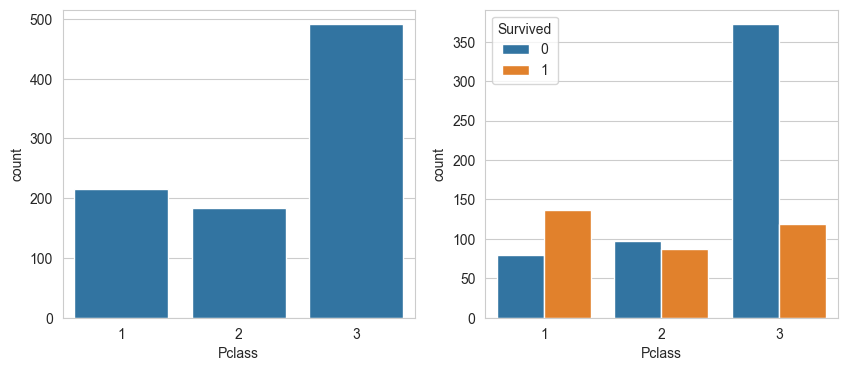

In [ ]:
count_n_plot(df = titanic_train, col_name = 'Pclass', countsplit = 'Survived')


,Count,Percentage
Pclass,,
1,216,24.2
2,184,20.7
3,491,55.1


Count  Percentage
Pclass Survived                   
1      0            80         9.0
       1           136        15.3
2      0            97        10.9
       1            87         9.8
3      0           372        41.8
       1           119        13.4

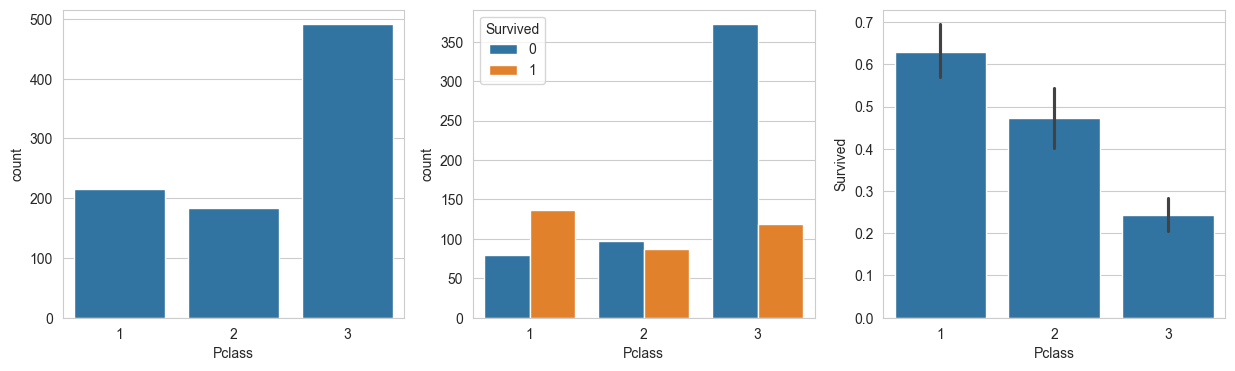

In [ ]:
count_n_plot(df = titanic_train, col_name = 'Pclass', countsplit = 'Survived', bar = True)


,Count,Percentage
Sex,,
female,314,35.2
male,577,64.8


Count  Percentage
Sex    Survived                   
female 0            81         9.1
       1           233        26.2
male   0           468        52.5
       1           109        12.2

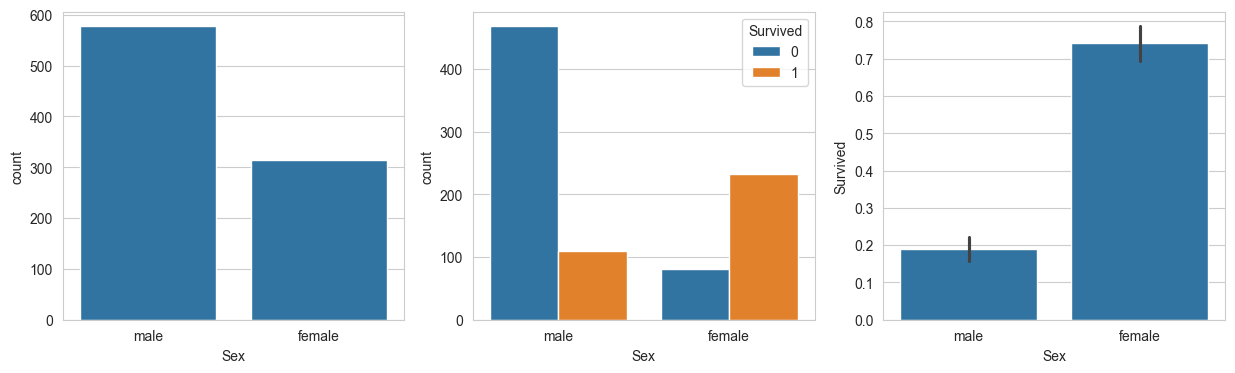

In [ ]:
count_n_plot(df = titanic_train, col_name = 'Sex', countsplit = 'Survived', bar = True)

,Count,Percentage
Sex,,
female,314,35.2
male,577,64.8


Count  Percentage
Sex    Pclass                   
female 1          94        10.5
       2          76         8.5
       3         144        16.2
male   1         122        13.7
       2         108        12.1
       3         347        38.9

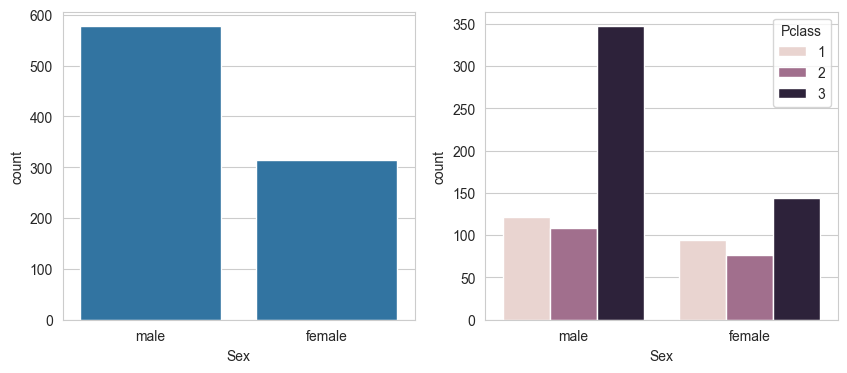

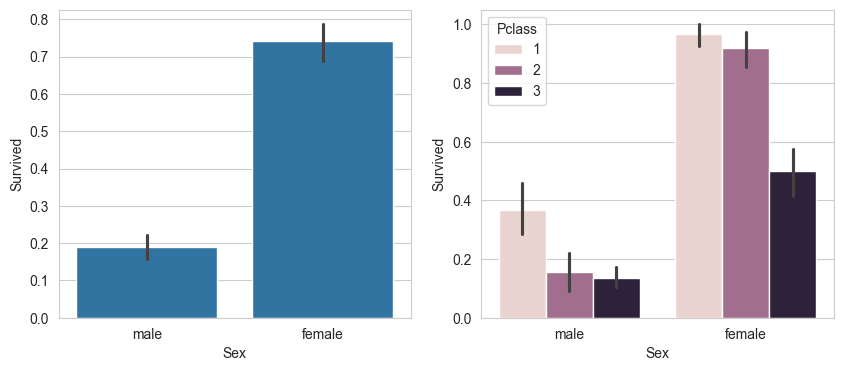

In [ ]:
count_n_plot(df = titanic_train, col_name = 'Sex', countsplit = 'Pclass', bar = True, barsplit = 'Pclass')

,Count,Percentage
Embarked,,
C,168,18.9
Q,77,8.7
S,644,72.4


Count  Percentage
Embarked Survived                   
C        0            75         8.4
         1            93        10.5
Q        0            47         5.3
         1            30         3.4
S        0           427        48.0
         1           217        24.4

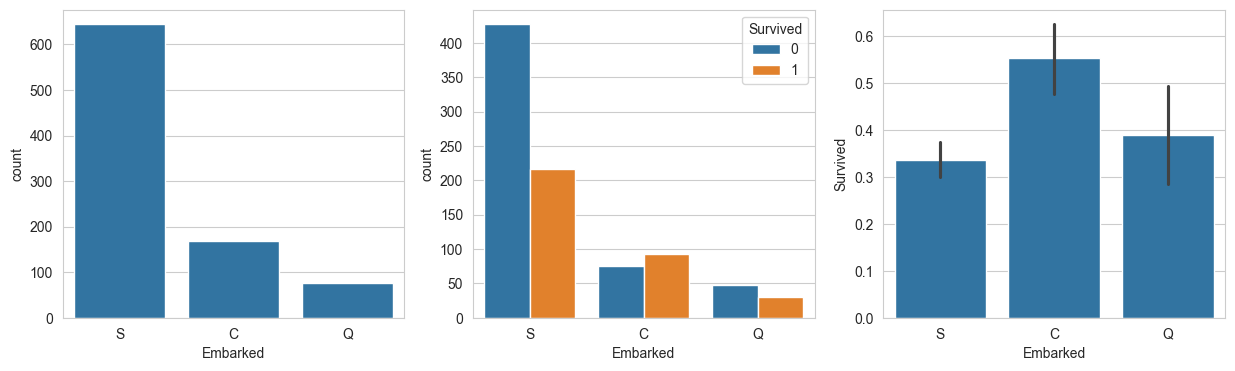

In [ ]:
count_n_plot(df = titanic_train, col_name = 'Embarked', countsplit = 'Survived', bar = True)

,Count,Percentage
Embarked,,
C,168,18.9
Q,77,8.7
S,644,72.4


Count  Percentage
Embarked Pclass                   
C        1          85         9.6
         2          17         1.9
         3          66         7.4
Q        1           2         0.2
         2           3         0.3
         3          72         8.1
S        1         127        14.3
         2         164        18.4
         3         353        39.7

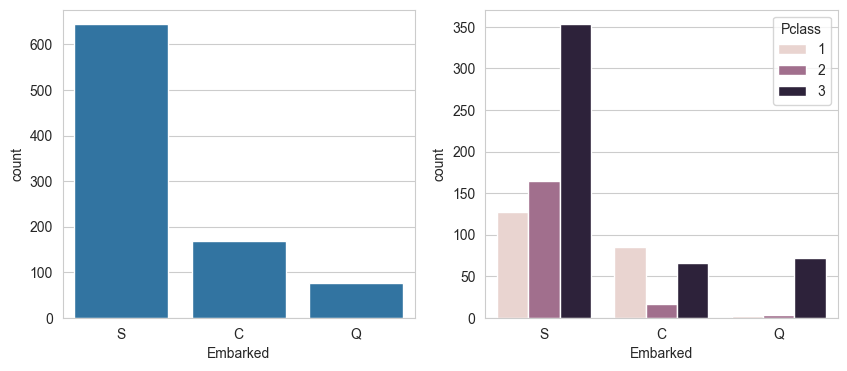

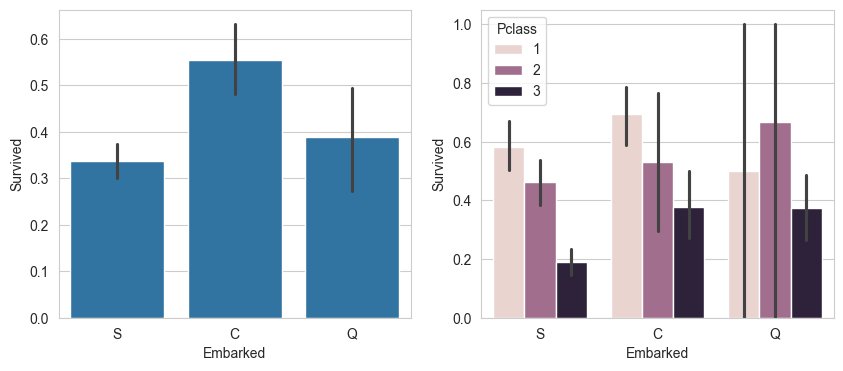

In [ ]:
count_n_plot(df = titanic_train, col_name = 'Embarked', countsplit = 'Pclass', bar = True, barsplit = 'Pclass')

,Count,Percentage
Parch,,
0,678,76.1
1,118,13.2
2,80,9.0
3,5,0.6
4,4,0.4
5,5,0.6
6,1,0.1


Count  Percentage
Parch Survived                   
0     0           445        49.9
      1           233        26.2
1     0            53         5.9
      1            65         7.3
2     0            40         4.5
      1            40         4.5
3     0             2         0.2
      1             3         0.3
4     0             4         0.4
5     0             4         0.4
      1             1         0.1
6     0             1         0.1

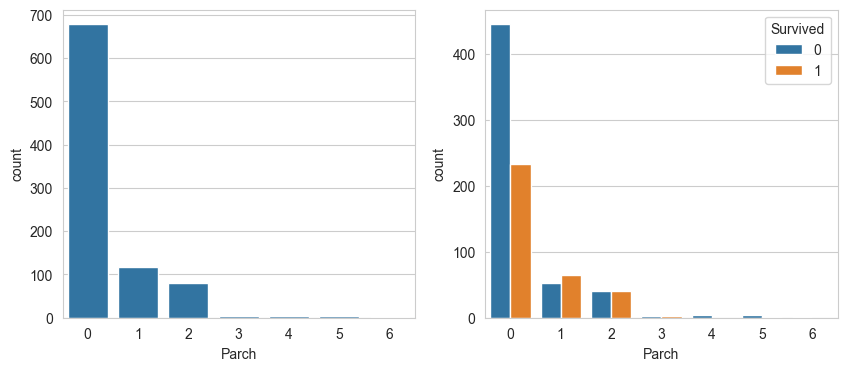

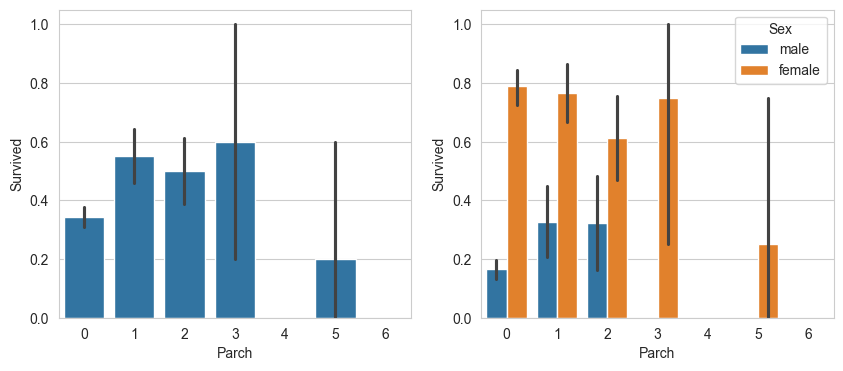

In [ ]:
count_n_plot(df = titanic_train, col_name = 'Parch', countsplit = 'Survived', bar = True, barsplit = 'Sex')

In [ ]:
titanic_train.isnull().sum()*100 / len(titanic_train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
titanic_train.isnull().sum()*100 / len(titanic_train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [ ]:
titanic_train[titanic_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
mean_age = round(titanic_train['Age'].mean(), 1)
print(mean_age)

29.7


In [ ]:
titanic_train['Age'].replace(np.nan, mean_age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.7
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
# iloc means index location
titanic_train.iloc[[5,19,28,863,878],:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [ ]:
mode_embarked = titanic_train['Embarked'].mode()[0] 
print(mode_embarked)

S


In [ ]:
print(type(titanic_train['Embarked'].mode()))
print(type(titanic_train['Embarked'].mode()[0]))

<class 'pandas.core.series.Series'>
<class 'str'>


In [ ]:
# look at missing values for Embarked column
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
# replace them with mode
titanic_train['Embarked'].replace(np.nan, mode_embarked)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [ ]:
# check if replaced correctly
titanic_train.iloc[[61,829],:]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
titanic_train.drop(columns='Cabin', inplace=True)
# Check new dataset
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
titanic_train.drop(columns=['PassengerId','Name','Ticket','Embarked'], inplace=True)

In [ ]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
# Drop Sex_female
titanic_train.drop('Sex_female', axis=1, inplace=True)
titanic_train.head()

KeyError: "['Sex_female'] not found in axis"

In [ ]:
titanic_train = pd.get_dummies(titanic_train, columns=['Pclass'], drop_first=True)


KeyError: "None of [Index(['Pclass'], dtype='object')] are in the [columns]"

In [ ]:
titanic_train.head()

,Survived,Sex,Age,SibSp,Fare,Pclass_2,Pclass_3
0,0,male,22.0,1,7.2500,False,True
1,1,female,38.0,1,71.2833,False,False
2,1,female,26.0,0,7.9250,False,True
3,1,female,35.0,1,53.1000,False,False
4,0,male,35.0,0,8.0500,False,True


In [ ]:
# Read in the test dataset
titanic_test = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
# Inspect the test dataset
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Check for null values
titanic_test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Cleaning Age column
mean_age_test = titanic_test['Age'].mean()
print(mean_age_test)

29.69911764705882


In [ ]:
titanic_test['Age'].replace(np.nan, mean_age_test)

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
# Cleaning Fare column
mean_fare_test = titanic_test['Fare'].mean()
print(mean_fare_test)

32.204207968574636


In [ ]:
titanic_test['Fare'].replace(np.nan, mean_fare_test)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [ ]:
# Remove irrelevant columns but keep a copy of PassengerId column
eye_dee = titanic_test['PassengerId']
titanic_test.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'], inplace=True)

KeyError: 'PassengerId'

In [ ]:
titanic_test.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
titanic_test.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
# One-hot encoding Pclass and Sex
titanic_test = pd.get_dummies(data=titanic_test, columns=['Pclass','Sex'], drop_first=True)

In [ ]:
titanic_test.head()

NameError: name 'titanic_test' is not defined